# King County Home Prediction 
Jakob M Paulson-Palmer

December 2022

# Introduction

Recently two friends of mine were looking to buy a home in Seattle and were struggling not only to comprehend a large ever expanding list of properties and their value based off of a vareity of factors, as well as deciding what was a reasonable offer to put in. This project investigates housing data in King county and the greater Seattle area. We will then use this data to further delve and graph the relationships and correlations between data and investigate attributes of interest such as zipcode and square footage of the properties.

In addition to analysis and visualization of the dataset, in this project we will use linear regression, decesion tree regression and random forest regression with the goal of persuing a good predictive model for home price.

# Requirements

- Pandas
- Numpy
- Sklearn
- Seaborn
- Matplotlib
- Graphviz

# Description

The python program reads in a dataset from a csv file found on kaggle. It then performs exploratory data analysis and data visualization in the form of a heatmap and pairplot, bar graphs and plots. Once we have a better understanding of the data and correlations within it, we proceed to sanitize the data and prepare it for the application of our machine learning models. We then define three different models, a linear regression, decision tree regressor and random forest regressor to the same origional dataset.

# Conclusion

We applied three different models to our dataset, linear regression, a decision tree regressor, and a random forest regressor. Each of the models provided a slight degree of learning, however each one struggled to make a good fit to the data and provide consistent accurate results beyond basic approximation.

For the linear regression we were able to observe a poor fit through the very large R-squared value. In our random forest our large mean squared error as well as our root mean squared error.

# Python Program

### Data Collection

The data was sourced from kaggle.
- House Sales in King County, USA by Harlfoxem - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?datasetId=128&searchQuery=sklearn

In [1]:
import pandas as pd
import numpy as np
import locale 
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
# This package has been difficult to import. If the regular conda graphviz install doesnt work the below line may
# conda install -c conda-forge python-graphviz

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Reading The Data

We begin by reading in our data from the csv. We read this using pandas into a dataframe. We can then use pandas function to look at the first entries in the dataframe, and clone our dataframe into a working dataframe used for data sanitization.

In [2]:
house_df = pd.read_csv('kc_house_data.csv')

In [3]:
house_df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [4]:
df = house_df.copy()
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
print("Df Shape:", df.shape)
print("Number of Rows (Shape):", df.shape[0])
print("Number of Columns (Shape):", df.shape[1])

Df Shape: (21613, 21)
Number of Rows (Shape): 21613
Number of Columns (Shape): 21


In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Now we'll check if we have any null or NaN values. If we did we would need to decide weather or not to replace the null values or drop the affected rows.

In [7]:
df.isna().sum().add(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Visualizing the Data

Visualising our dataset can be a valuable tool in feature selection. Pairplots are one such plot that shows the corralation between two variables by plotting their values against each other. This gives us an idea of features we will want to focus on later in our program. at first glance there appears to be a degree of positive correlation in each of the square foot fields, as well as the bathrooms.

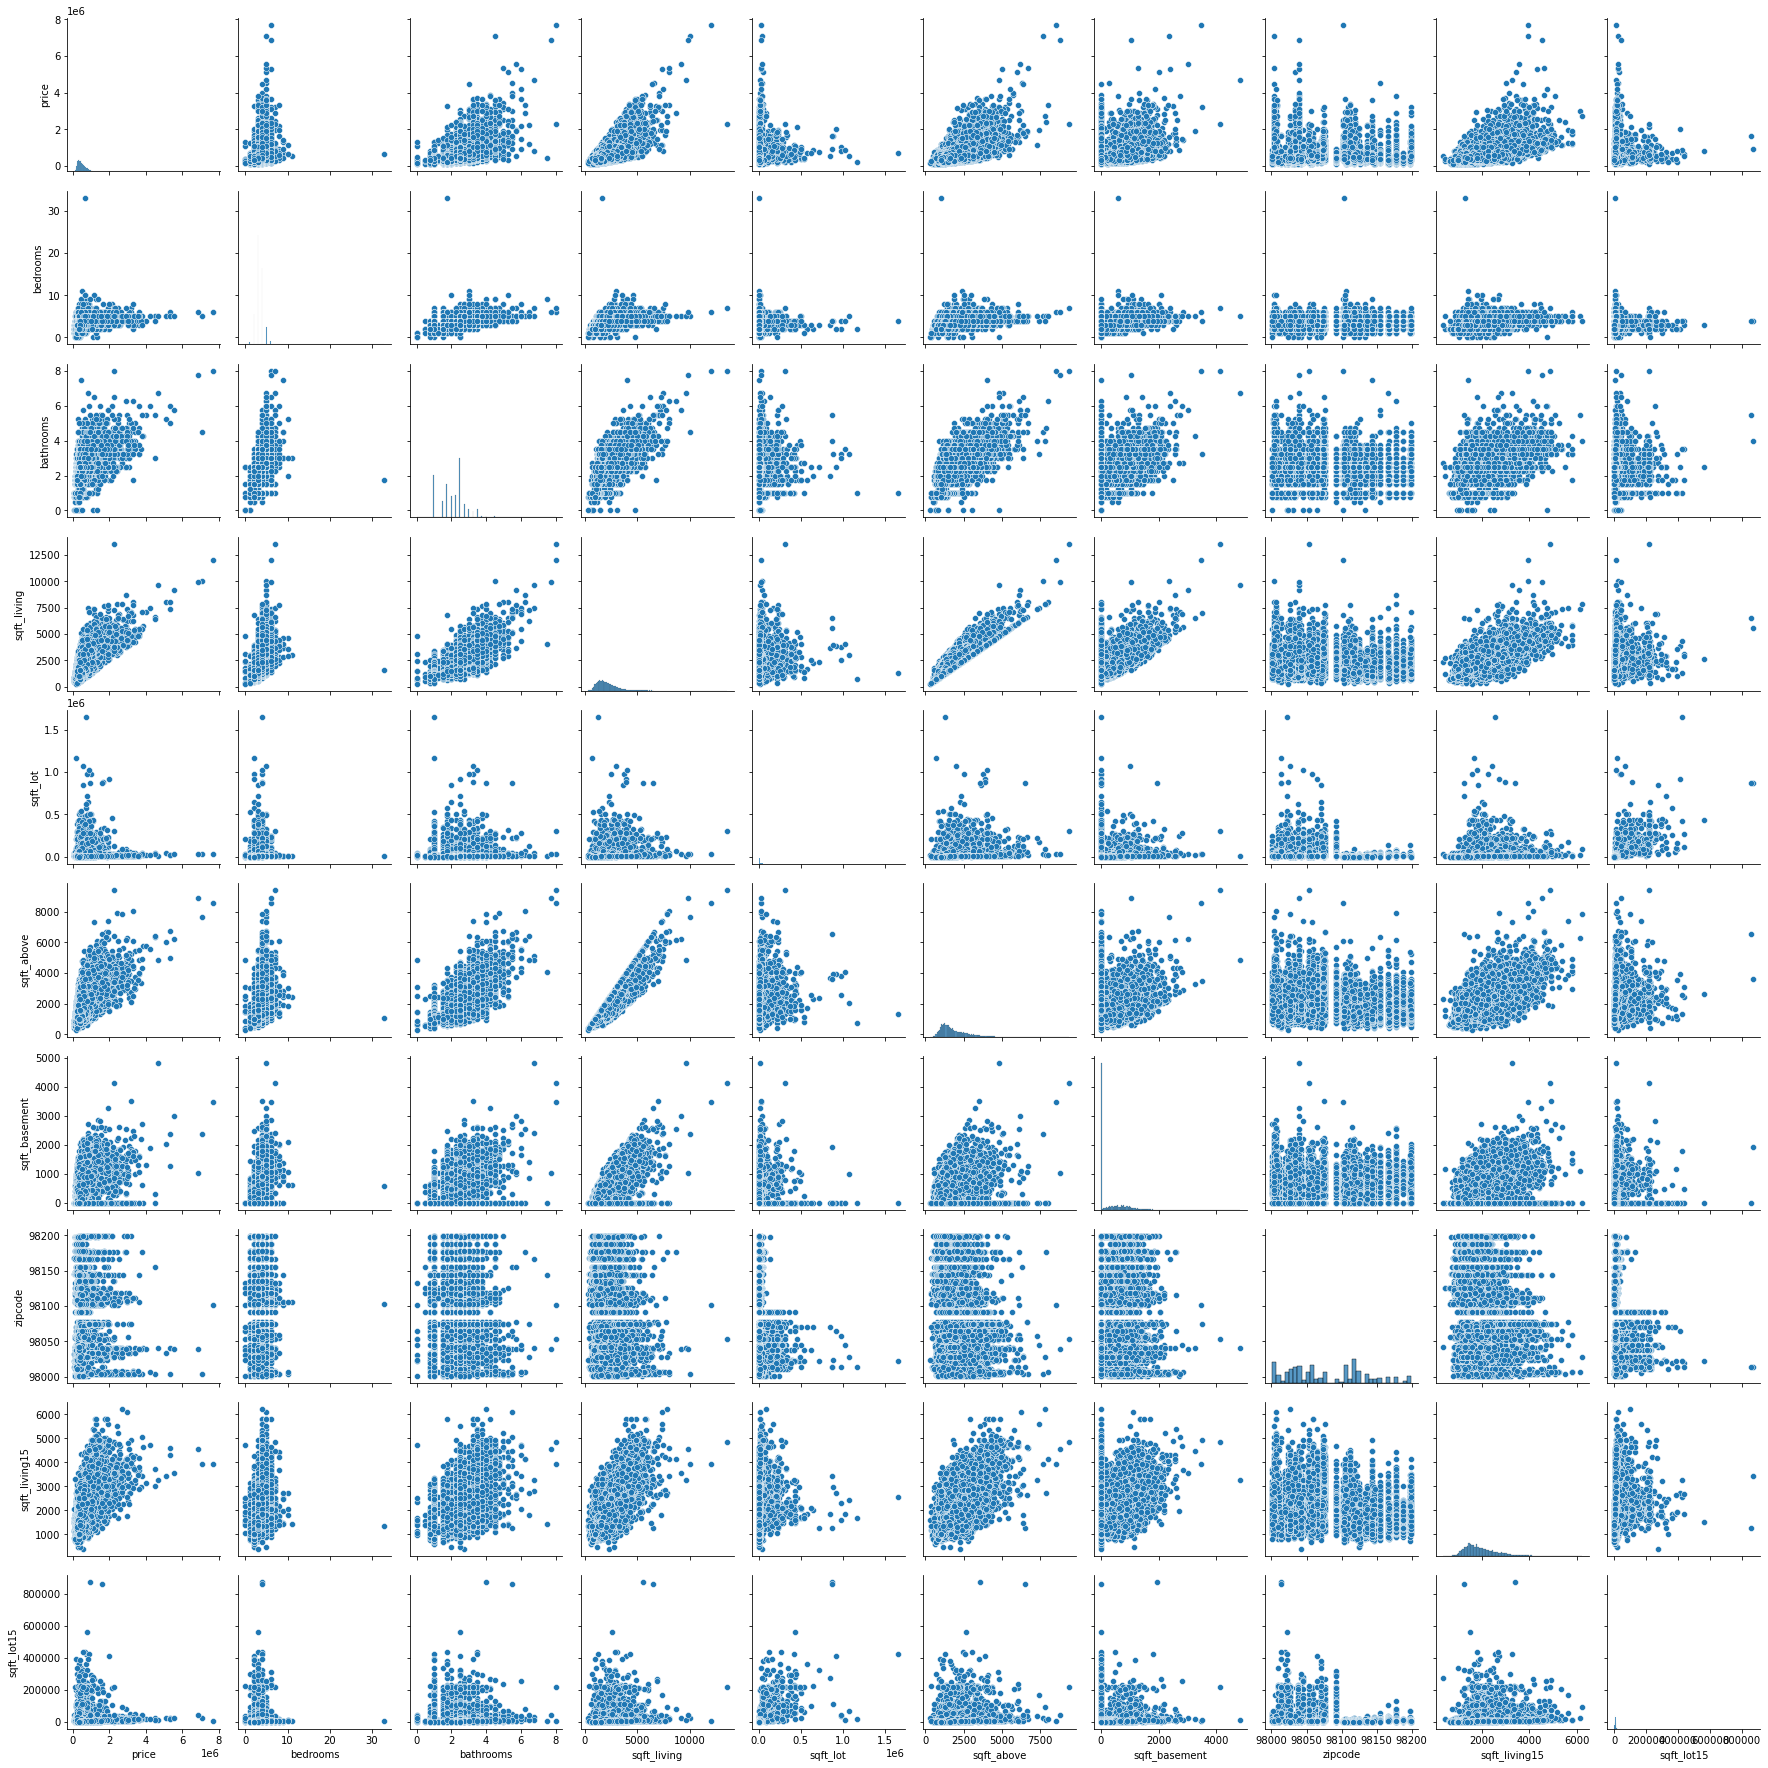

In [8]:
pairplot_df = df.drop(['floors','waterfront','view','condition'], axis=1)
pairplot_df = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above',
                  'sqft_basement', "zipcode","sqft_living15", "sqft_lot15"]]
   
sns.pairplot(pairplot_df)
plt.show()

Heatmaps are another method of analysing our data. Here we can see a stronger correlation between price and all features concerned wit square footage, grade, and bathrooms. Suprisingly, latitude has a significantly stronger correlation that longitude, however we will choose to disreguard both fields in our regression in favor of the ones with stronger correlation. 

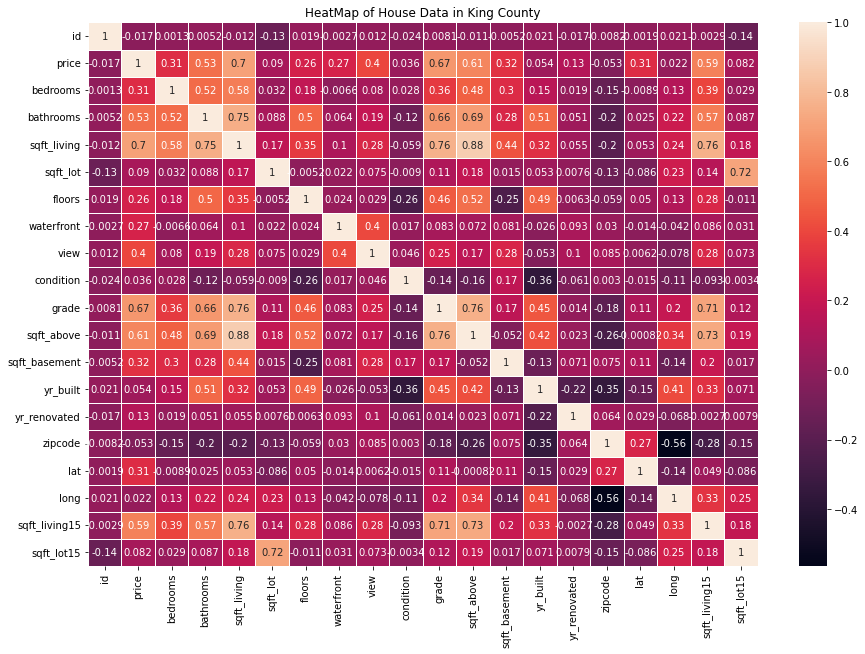

In [9]:
plt.figure(figsize=(15,10))
heat_map = sns.heatmap(df.corr(), linewidth = 1 , annot = True)
plt.title( "HeatMap of House Data in King County" )
plt.show()

Barplots can help investigate these relationships further. For example below we plot the relationship between sqft_living and sqft_above. As it would be expected, as the square footage for one feature increases, the other does as well.

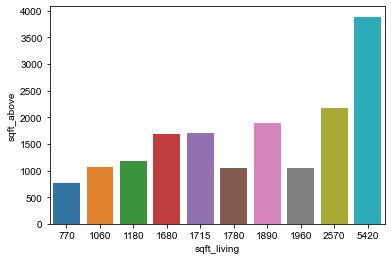

In [10]:
sns.barplot(x ="sqft_living", y ='sqft_above', data = df[:10]) 
sns.set(rc={"figure.figsize":(12, 12)}) #width=3, #height=4

# Expoloratory Data Analysis

Here we can dive a little deeper into a chosen feature. Lets begin with zipcode. First we can plot the number of entries in each of the largest zipcodes to get an idea of any outliers and the general spread of data.

We can also plot the Average price by zipcode to show the average price of each zipcode. From the plot we can see the most expensive neighborhood is an outlier, however the rest of the zipcodes are much more similarly priced.

[Text(0.5, 1.0, 'Number of Homes per Zipcode')]

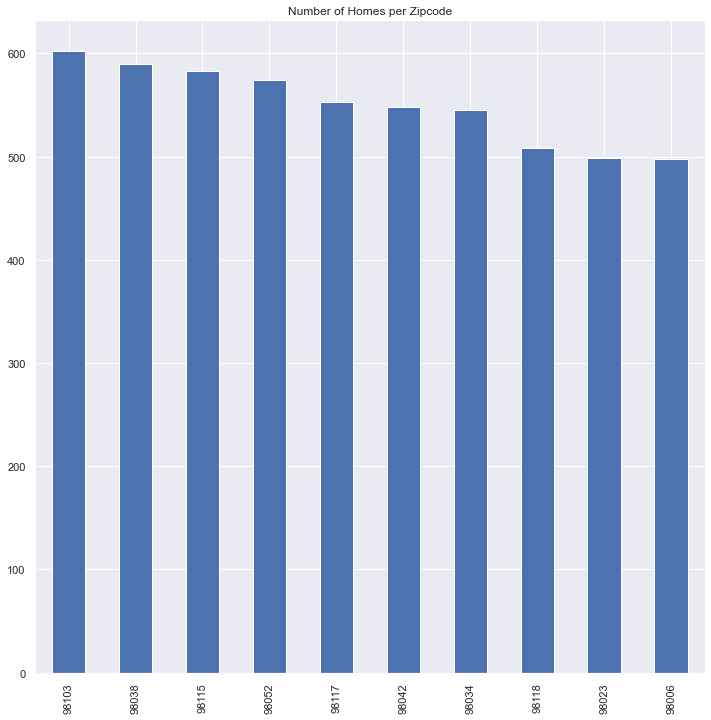

In [11]:
df['zipcode'].value_counts()[:10].plot.bar(x='count', y='zip-code').set(title='Number of Homes per Zipcode')

Next we will define some functions to help explore the data a little deeper. Print currency simply takes a value and returns a string in local currency format. Average Price By Zipcode returns the average home price in a given zipcode. Lastly, Evaluate House By Zipcode takes home data to compare each of the entries zipcodes to its median before printing the comparison.

In [12]:
locale.setlocale(locale.LC_ALL, '')

def Print_Currency(amount):
    return locale.currency(amount, grouping=True)

def Average_Price_By_Zipcode(zipcode):
    zip_df = df[df['zipcode'] == zipcode]
    count = len(zip_df)
    avg_price = zip_df.price.sum() / count
    return avg_price

In [13]:
def Evaluate_House_By_Zipcode(house_data):
    price = house_data.price
    avg_zip_price = Average_Price_By_Zipcode(house_data.zipcode)
    print('House Price:',Print_Currency(price),'\nAverage Price:', Print_Currency(avg_zip_price))
    
    diff = price - avg_zip_price
    cheaper = ''
    if diff < 0:
        diff = diff * -1
        cheaper = 'Cheaper than predicted'
    else:
        cheaper = 'More Expensive than predicted'
    print('Difference: {} ({}%), {}\n'.format(Print_Currency(round(diff, 2)), round(avg_zip_price / diff, 2), cheaper))
    

In [14]:
average_prices = []
zip_codes = []
for zipcode in df.zipcode.unique():
    avg_price = Average_Price_By_Zipcode(zipcode)
    average_prices.append(avg_price)
    zip_codes.append(zipcode)
    
zipdf = pd.DataFrame({"prices":average_prices, "zipcodes":zip_codes})
zipdf = zipdf.sort_values(by='prices', ascending=False)
for i in range(10):
    print('zipcode:', zipdf.zipcodes.iloc[i], '- average:', locale.currency(zipdf.prices.iloc[i], grouping=True))

zipcode: 98039 - average: $2,160,606.60
zipcode: 98004 - average: $1,355,927.08
zipcode: 98040 - average: $1,194,230.02
zipcode: 98112 - average: $1,095,499.34
zipcode: 98102 - average: $901,258.27
zipcode: 98109 - average: $879,623.62
zipcode: 98105 - average: $862,825.23
zipcode: 98006 - average: $859,684.78
zipcode: 98119 - average: $849,448.02
zipcode: 98005 - average: $810,164.88


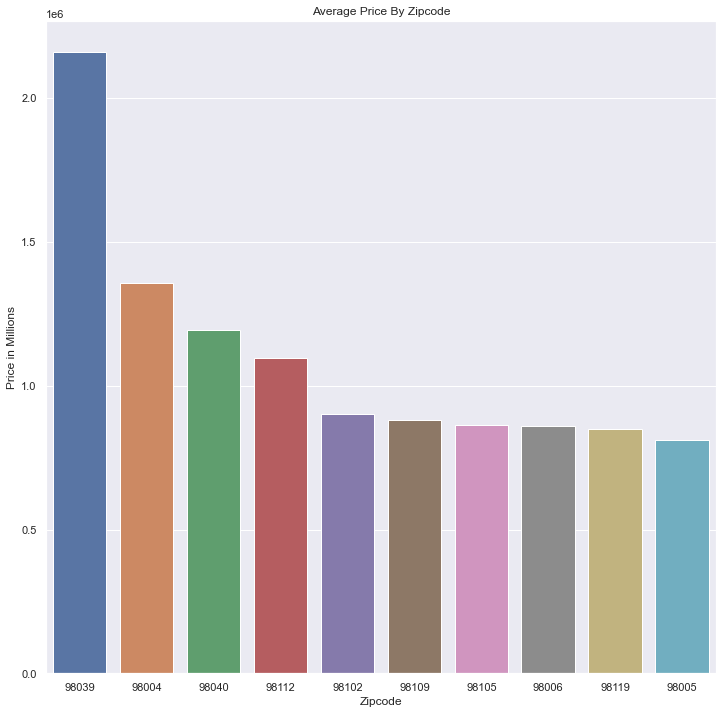

In [15]:
sns.barplot(data=zipdf[:10], x="zipcodes", y="prices", order=zipdf.sort_values('prices', ascending=False).zipcodes[:10])
sns.set(rc={"figure.figsize":(12, 12)}) #width=3, #height=4
plt.title('Average Price By Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')
plt.show()

Now we can use the Evaluate House By Zipcode function we just wrote to look at how a few entries compare to the mean price in their neighborhood.

In [16]:
for i in range(10):
    Evaluate_House_By_Zipcode(df.iloc[i])

House Price: $221,900.00 
Average Price: $310,612.76
Difference: $88,712.76 (3.5%), Cheaper than predicted

House Price: $538,000.00 
Average Price: $469,455.77
Difference: $68,544.23 (6.85%), More Expensive than predicted

House Price: $180,000.00 
Average Price: $462,480.04
Difference: $282,480.04 (1.64%), Cheaper than predicted

House Price: $604,000.00 
Average Price: $551,688.67
Difference: $52,311.33 (10.55%), More Expensive than predicted

House Price: $510,000.00 
Average Price: $685,605.78
Difference: $175,605.78 (3.9%), Cheaper than predicted

House Price: $1,225,000.00 
Average Price: $678,163.06
Difference: $546,836.94 (1.24%), More Expensive than predicted

House Price: $257,500.00 
Average Price: $294,111.28
Difference: $36,611.28 (8.03%), Cheaper than predicted

House Price: $291,850.00 
Average Price: $302,878.88
Difference: $11,028.88 (27.46%), Cheaper than predicted

House Price: $229,500.00 
Average Price: $359,483.24
Difference: $129,983.24 (2.77%), Cheaper than pre

In [17]:
def Get_Percent_Of_Two(num_one, num_two):
    if num_one < num_two:
        return num_one / num_two
    else:
        return num_two / num_one
    
def Get_Difference_Of_Two(num_one, num_two):
    if num_one > num_two:
        return num_one - num_two
    else:
        return num_two - num_one

# Data Prep for Applying Logistic Regression

Now we must prepare our data for the application of our models. We arent going to need our latitude longitude, dat or id fields so we can drop them from the dataset.

In [18]:
df = df.drop(['lat','long', 'date','id'], axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

We will then seperate our features of interest, and our target variables. Once we have these two seperate datasets, we normalize our x variables using StandardScaler and pass them to sklearns test_train_split function to get an x and y test and train set respectively.

We can see in the shapes printed that with a test_size of 0.3 we should get a 70-30 split between our train and test data.

In [19]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15']
target = ['price']


trans = StandardScaler()
X = df[features]
X = trans.fit_transform(X)
X = pd.DataFrame(X)
y = df[target]

def Split_Data(x_set, y_set):
    xdr_train, xdr_test, ydr_train, ydr_test = train_test_split(x_set, y_set, test_size=0.3, random_state=2)
    return xdr_train, xdr_test, ydr_train, ydr_test

xdr_train, xdr_test, ydr_train, ydr_test = Split_Data(X, y)
print('Train Size:', xdr_train.shape[0])
print('Test Size:', xdr_test.shape[0])


Train Size: 15129
Test Size: 6484


# Linear Regression

### Training our Model

We are using the sklearn package to create our linear regression, and fit our model to the regression using our training data.

In [20]:
model = LinearRegression()
model.fit(xdr_train, ydr_train)

LinearRegression()

### Viewing our Results / Verifying our Model

We can obtain our R-squared value by finding the score of our model. We may also call this the coefficient of determination, and it helps us understand the variance of our model.



The slope shows our mean change in our regression. This value is multiplied by the predictive value as the regression is fit. 

In [21]:
r_sq = model.score(xdr_test, ydr_test)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
print('-'*24)
y_pred = model.predict(xdr_test)
print(f"predicted:\n{y_pred}")

coefficient of determination: 0.6638472818263095
intercept: [541437.84851442]
slope: [[ -35420.97279879   35523.24857627   73912.66985433   -1215.33112365
    16695.12203964   44176.00583291   33286.83041278   14410.61623121
   141468.19920725   61110.26870714   39043.22426617 -103947.79232894
     5352.29072429   -1252.0315612    18177.96921849  -14082.63668748]]
------------------------
predicted:
[[ 660734.80140185]
 [1393921.3926296 ]
 [ 319341.69066001]
 ...
 [ 519289.35524055]
 [ 342573.48101825]
 [ 706097.66421449]]


We can combine our y predicted values, and our y testing values to get a dataframe representation of our models performance. We can see in our actual value column the actual value of the home, as well as the value our model is predicting in the predicted value column. We also include the difference between price, where this value is negative when our model over-estimates, and positive when it under-estimates.

In [22]:
y_pred_cost = y_pred.ravel()
model_diff = pd.DataFrame({'Actual value': ydr_test.to_numpy().ravel(), 'Predicted value': y_pred_cost, 
                           'Diff': ydr_test.to_numpy().ravel() - y_pred.ravel(),
                           'Percent diff': y_pred.ravel() / ydr_test.to_numpy().ravel()})
model_diff.head()

,Actual value,Predicted value,Diff,Percent diff
0,735000.0,6.607348e+05,74265.198598,0.898959
1,1150000.0,1.393921e+06,-243921.392630,1.212106
2,350500.0,3.193417e+05,31158.309340,0.911103
3,860000.0,1.177582e+06,-317582.312877,1.369282
4,122000.0,1.897954e+05,-67795.422383,1.555700


In [23]:
model_pred = model.predict(df[features][:1]).item(0)
actual = df[target][:1].price[0]
print('Predicted:', Print_Currency(model_pred))
print('Actual:', Print_Currency(actual))
diff = Get_Difference_Of_Two(model_pred, actual)
percent_diff = Get_Percent_Of_Two(diff, actual)
print('diff:', Print_Currency(round(diff, 4)) )

Predicted: -$227,366,957.95
Actual: $221,900.00
diff: $227,588,857.95


/Users/jakepalmer/Documents/Programming/python/anaconda3/envs/df_final/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Decision Tree Regressor

The Decision Tree Regressor attempts to build a decision tree to categorize our entries into a specefic set of price to closely approximate what the price of a home may be.

In [24]:
xdt_train, xdt_test, ydt_train, ydt_test = Split_Data(X, y)

dtree = DecisionTreeRegressor(random_state=0)
cross_val_score(dtree, xdt_train, ydt_train, cv=10)
dtree.fit(xdt_train, ydt_train)

DecisionTreeRegressor(random_state=0)

In [25]:
random_num = round(np.random.rand() * xdr_test.shape[0])
ydt_pred = dtree.predict(xdt_test)
  
print("Predicted price:\n", ydt_pred[:3])
print('Y-test:',ydt_test.head(3))

Predicted price:
 [ 620000. 1185000.  526000.]
Y-test:           price
6638   735000.0
7366  1150000.0
3158   350500.0


# Random forest regressor

Random forest is another model we can use to create a regression on our data. Random forest implements multiple decision trees that we have already seen to attempt to take the same approach, this time approximated over a series of trees. Sklearn also provides libraries to assist in implementing this model.

In [26]:
random_forest = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)
xrf_train, xrf_test, yrf_train, yrf_test = Split_Data(X, y)

In [27]:
random_forest.fit(xrf_train, yrf_train)

print('predicted:', round(random_forest.predict(xrf_test)[0], 2), '- test:', yrf_test.iloc[0].price)

/Users/jakepalmer/Documents/Programming/python/anaconda3/envs/df_final/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


predicted: 555749.57 - test: 735000.0


### Mean Squared Error

The Mean Squared Error is a function that takes an average of the sum of squares of our data. This give an approximation of how well our regressor fits our data.

The lower our MSE (mean squared error) the better fit our line is. A MSE of 0 is a perfect fit. As we can see we hace a very large mse and rmse, therefore we observe we do not have a good fit to our data.

In [28]:
prediction = random_forest.predict(xrf_test)
mse = mean_squared_error(yrf_test, prediction)
rmse = mse**.5
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 44793330696.39362
Root Mean Squared Error: 211644.34954988433


We can visualize our random forest algorithm using sklearn and graphviz. This allows us to see the way our algorithm processes each entry for a given estimator using each feature value, squared error and the number of samples.

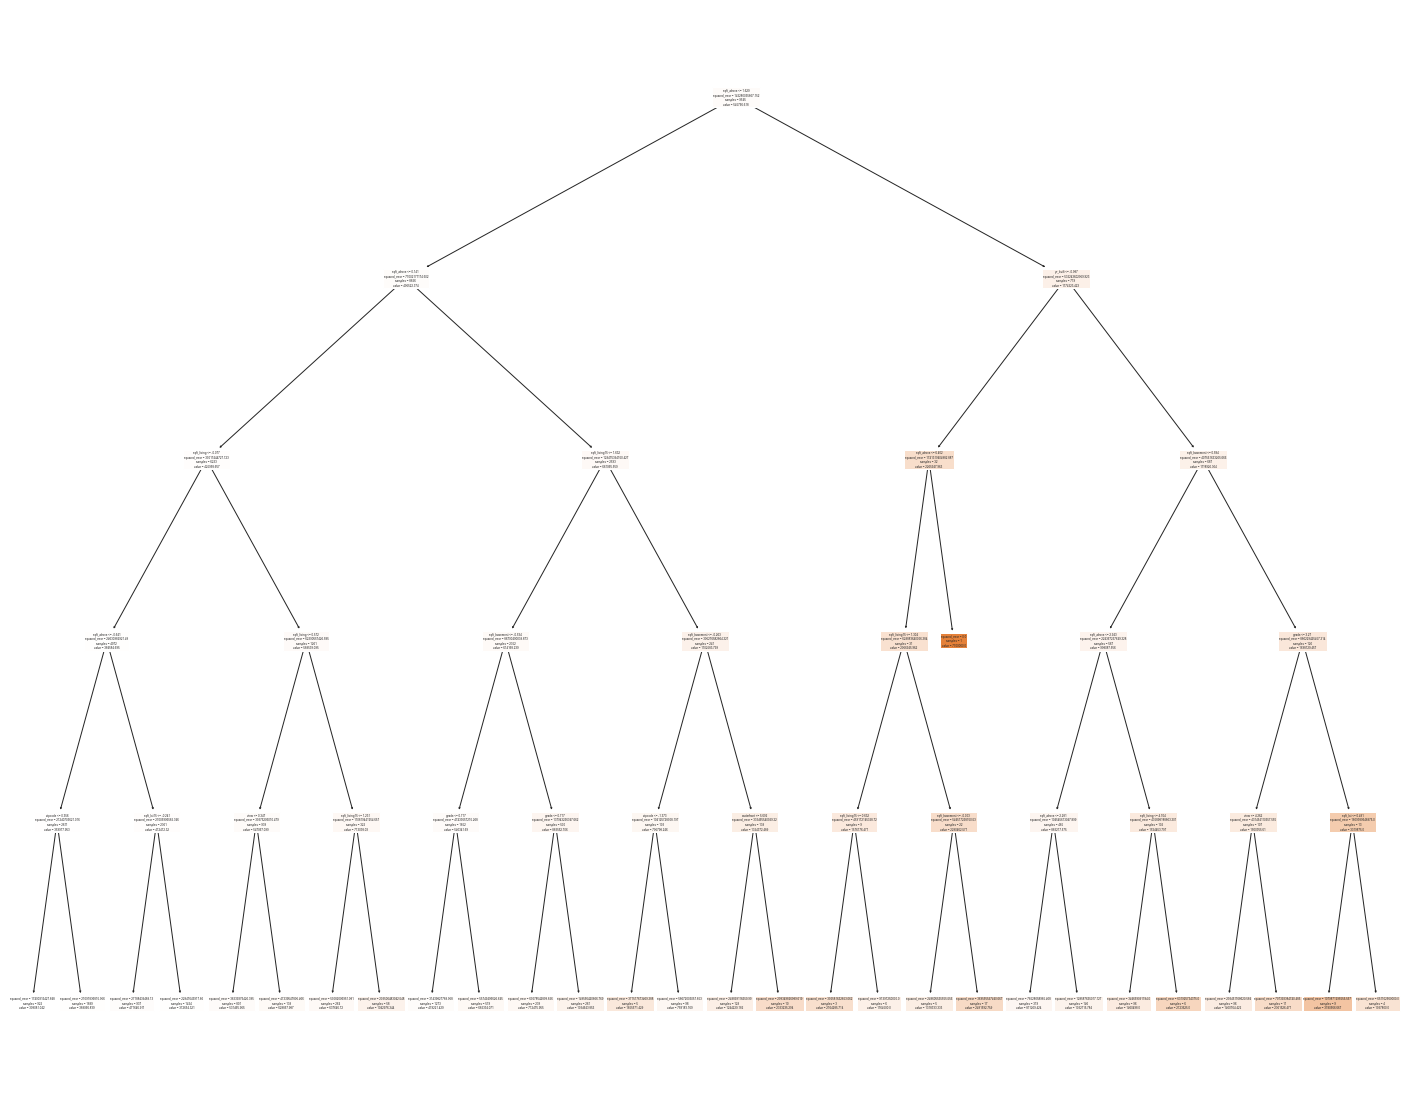

In [31]:
fig = plt.figure(figsize=(25,20))
dot_data = tree.plot_tree(decision_tree=random_forest.estimators_[0], 
#                                 out_file=None, 
                                feature_names=features,  
                                class_names='price',
                                filled=True)

# Graphviz is not working in jupyter, but does produce a more readable version of this graph in google colab
# graph = graphviz.Source(dot_data, format="png") 
# graph

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=iris.feature_names,  
#                    class_names=iris.target_names,
#                    filled=True)